In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# defining global variable path
# Location of my dataset on My Google Drive
image_path = "drive/My Drive/COVID-Images/Prediction"
import tensorflow as tf

def loadImages(path):
    '''Put files into lists and return them as one list with all images
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpeg') or file.endswith('.jpg') or file.endswith('.png')])
    return image_files

In [ ]:
image_path

'drive/My Drive/COVID-Images/Prediction'

In [ ]:
image=plt.imread('/content/drive/My Drive/COVID-Images/Prediction/NORMAL2-IM-0338-0001.jpeg')

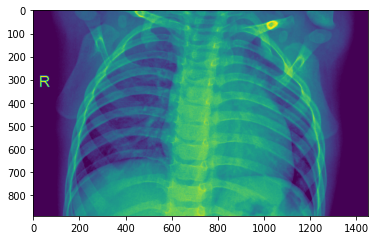

In [ ]:
plt.imshow(image)

In [ ]:
image2=plt.imread('/content/drive/My Drive/COVID-Images/Train/Covid/16654_1_1.png')

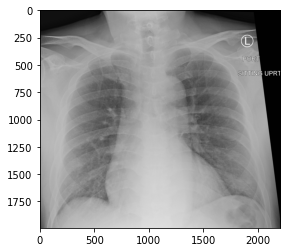

In [ ]:
plt.imshow(image2)

In [ ]:
image='/content/drive/My Drive/COVID-Images/Train/Covid'

In [ ]:
predictions=loadImages(image)

In [ ]:
predictions[0]

'/content/drive/My Drive/COVID-Images/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'

In [ ]:
plt.imread(predictions[0])

array([[[182, 182, 182],
        [169, 169, 169],
        [152, 152, 152],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[165, 165, 165],
        [150, 150, 150],
        [138, 138, 138],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[146, 146, 146],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[243, 243, 243],
        [244, 244, 244],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [ ]:
sample=plt.imread(predictions[0])

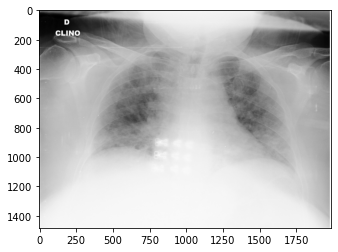

In [ ]:
plt.imshow(sample)

# This is the dataset required for training and testing

In [ ]:
image_shape = (1000,1000,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 497, 497, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 248, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 246, 246, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 968256)            0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
batch_size = 16

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path='/content/drive/My Drive/COVID-Images/Train'
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 288 images belonging to 2 classes.


In [ ]:
test_path='/content/drive/My Drive/COVID-Images/Val'
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 60 images belonging to 2 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit(train_image_gen,epochs=5,
                              validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/5
18/18 [==============================] - 81s 4s/step - loss: 0.4089 - accuracy: 0.8819 - val_loss: 0.3147 - val_accuracy: 0.8833
Epoch 2/5
18/18 [==============================] - 81s 4s/step - loss: 0.3430 - accuracy: 0.8750 - val_loss: 0.1902 - val_accuracy: 0.9500
Epoch 3/5
18/18 [==============================] - 81s 4s/step - loss: 0.2110 - accuracy: 0.9062 - val_loss: 0.1135 - val_accuracy: 0.9500
Epoch 4/5
18/18 [==============================] - 81s 4s/step - loss: 0.2771 - accuracy: 0.8958 - val_loss: 0.2833 - val_accuracy: 0.9000
Epoch 5/5
18/18 [==============================] - 81s 4s/step - loss: 0.3035 - accuracy: 0.8889 - val_loss: 0.1422 - val_accuracy: 0.9500


In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files

In [ ]:
model.save('CNN-Covid-19.h5')

In [ ]:
files.download('CNN-Covid-19.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Evaluating Model

In [ ]:
losses = pd.DataFrame(model.history.history)

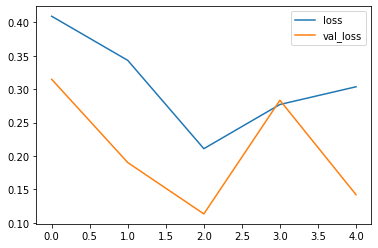

In [ ]:
losses[['loss','val_loss']].plot()

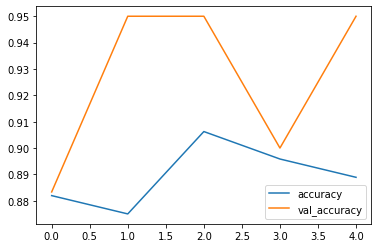

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(test_image_gen)

4/4 [==============================] - 10s 3s/step - loss: 0.2018 - accuracy: 0.9500


[0.20180979371070862, 0.949999988079071]

In [ ]:
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
pred_probabilities

array([[0.05339739],
       [0.00511634],
       [0.8961104 ],
       [0.04240943],
       [0.02663861],
       [0.0151247 ],
       [0.03133244],
       [0.06892291],
       [0.00276962],
       [0.28983468],
       [0.1506387 ],
       [0.02226847],
       [0.01198699],
       [0.2610713 ],
       [0.02077943],
       [0.438305  ],
       [0.00622136],
       [0.43122935],
       [0.00569794],
       [0.0285676 ],
       [0.01448947],
       [0.04010426],
       [0.00467631],
       [0.07515813],
       [0.0116099 ],
       [0.21589454],
       [0.26735952],
       [0.04605805],
       [0.02113337],
       [0.31399798],
       [0.9587341 ],
       [0.98306483],
       [0.8666763 ],
       [0.71375775],
       [0.9340746 ],
       [0.9745077 ],
       [0.98894846],
       [0.9953181 ],
       [0.9725232 ],
       [0.8099123 ],
       [0.8088784 ],
       [0.985008  ],
       [0.9258529 ],
       [0.9675437 ],
       [0.9980761 ],
       [0.88261485],
       [0.99815625],
       [0.771

In [ ]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[29,  1],
       [ 2, 28]])

#Model perdictions

In [ ]:
predict_path='/content/drive/My Drive/COVID-Images/Prediction/NORMAL2-IM-0352-0001.jpeg'

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(predict_path,target_size=image_shape)

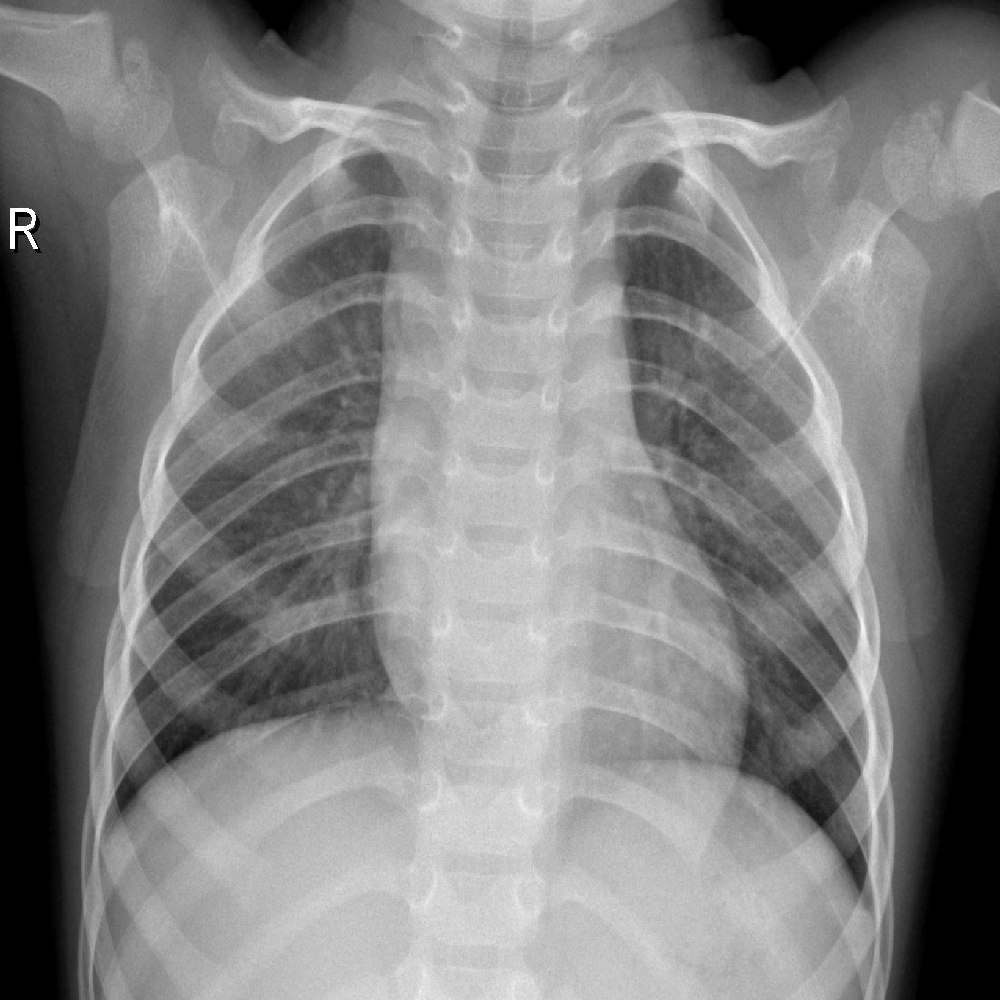

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
my_image.shape

(1000, 1000, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 1000, 1000, 3)

In [ ]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_image_gen.class_indices

{'Covid': 0, 'Normal': 1}

Another Covid prediction

In [ ]:
predict_path2='/content/drive/My Drive/COVID-Images/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg'

In [ ]:
my_image2=image.load_img(predict_path2,target_size=(1000,1000,3))

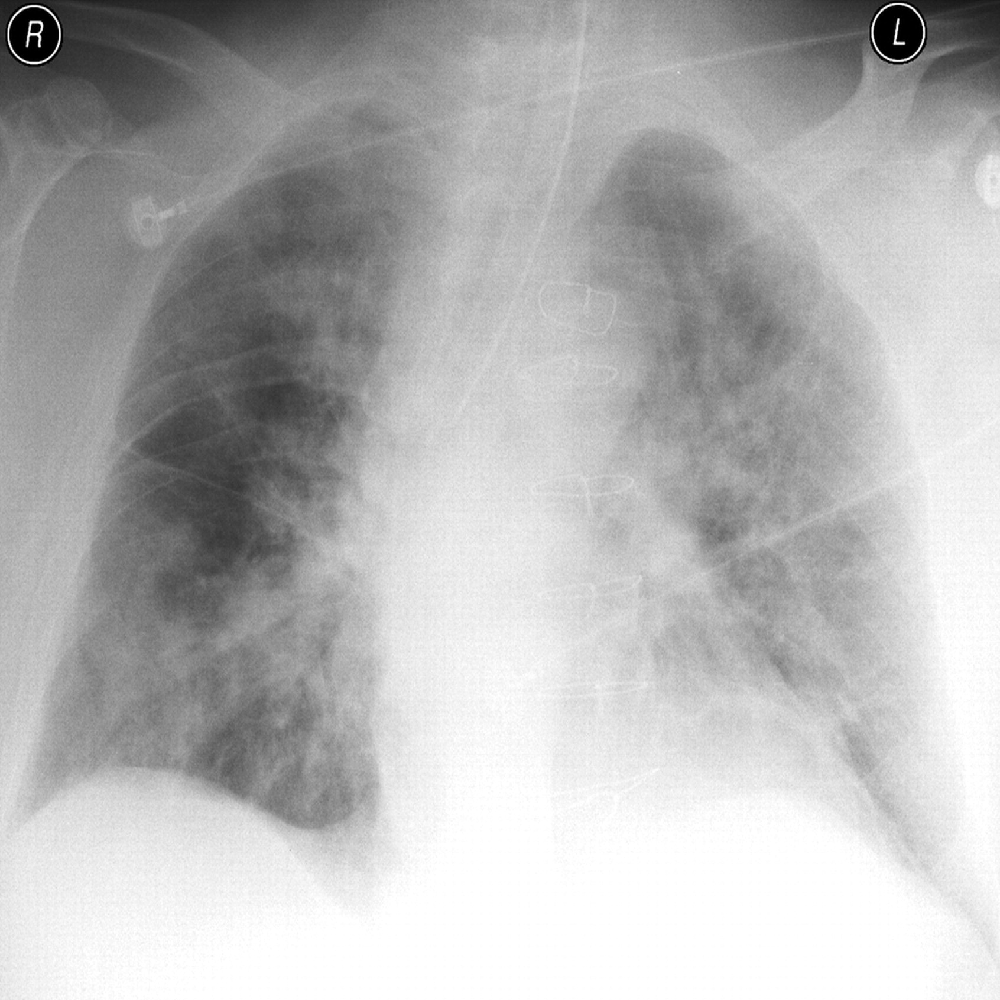

In [ ]:
my_image2

In [ ]:
my_image2=image.img_to_array(my_image2)

In [ ]:
my_image2.shape

(1000, 1000, 3)

In [ ]:
my_image2=np.expand_dims(my_image2,axis=0)

In [ ]:
my_image2.shape

(1, 1000, 1000, 3)

In [ ]:
model.predict(my_image2)

array([[0.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_image_gen.class_indices

{'Covid': 0, 'Normal': 1}